In [55]:
#Get wine. Go up one level and in folder DATA

import csv
with open('../DATA/winequality-red.csv', 'r') as file: 
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        print(row)
        print(len(row))
        break 
    print(type(reader))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
12
<class '_csv.reader'>


In [131]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('../DATA/winequality-red.csv') # importing the data from the .csv file

#dataset.sort_values('Al', inplace=True) # sort by ascending "Al" values
dataset.head(10) # print the first 5 rows
#type(dataset)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [132]:
#type(list(dataset.columns)[0])
headers=list(dataset.columns) #Get the headers of the dataset in an array
headers_train=list(train_dataset.columns)
headers_test=list(test_dataset.columns)
print(headers)
print(len(headers))
print(headers_train)
print(headers_test)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
12
['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [254]:
#Create data set X and labels Y
#list2=[dataset[{name}] for name in headers ]
#print(np.stack(list2, axis=-1))
X=np.stack((dataset[{name}] for name in headers if name != 'quality' ),axis=-1)
Y=np.stack(dataset['quality'])
print("Xtype",X.shape)
print("Ytype",Y.shape)
print(X[0][0])
print(Y[0:5])

Xtype (1599, 1, 11)
Ytype (1599,)
[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ]
[5 5 5 6 5]


In [213]:
#Creat a function that makes sets: 
#train_dataset = pd.read_csv('../DATA/winequality-red-train.csv') # importing the data from the .csv file
#test_dataset=pd.read_csv('../DATA/winequality-red-test.csv')
def dataset_generator(file_address):
    dataset=pd.read_csv(file_address)       #read the csv file
    headers=list(dataset.columns)           #extract the headers of each feature
   
    ##Create inputs stacking up the feature for X  and the  labels  for Y
    X=np.stack((dataset[{name}] for name in headers if name != 'quality' if name != 'Unnamed: 0'),axis=-1)
    X=np.squeeze(X)                          #Getting rid of extra dimension
    Y=np.stack(dataset['quality'])
    #Y=np.expand_dims(Y, axis=1)
    return X,Y


In [214]:
XX,YY=dataset_generator('../DATA/winequality-red-train.csv')
print(XX[0])
print(YY[0:4])
print(XX.shape)
print(YY.shape)

[10.6     0.42    0.48    2.7     0.065   5.     18.      0.9972  3.21
  0.87   11.3   ]
[6 5 6 6]
(1279, 11)
(1279,)


In [118]:


#Creating X database by hand
#wine_data = np.stack((dataset["fixed acidity"],dataset["volatile acidity"]), axis=-1)
#print(wine_data)
#print("data point", wine_data[0])
#type(wine_data)

In [121]:
#type(list(dataset.columns)[0])
#list(dataset.columns)

In [129]:
#Check there is no empty datapoints. if there is empty of a string type will be object. Do that will all of them
print(dataset["fixed acidity"].dtypes)
print(dataset["fixed acidity"])
#for name in headers:
   # print(dataset[name])

float64
0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64


In [ ]:
'''Exploring the data set'''
#Description of the data set: Get distributions of each feature, mean, min-max value, correlations with label
#data type: float64
#Length: 1599 data points
#Features: 12 print(len(headers))

(1599, 1, 11)


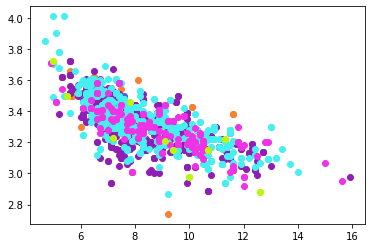

[(0, 'fixed acidity'), (1, 'volatile acidity'), (2, 'citric acid'), (3, 'residual sugar'), (4, 'chlorides'), (5, 'free sulfur dioxide'), (6, 'total sulfur dioxide'), (7, 'density'), (8, 'pH'), (9, 'sulphates'), (10, 'alcohol'), (11, 'quality')]


In [261]:
import sys
sys.path.append('..')
from utils import show_data
print(X.shape)
features1=X[:,0,[0,8]]
features=XX[:,[0,8]]
show_data(features,YY)
#print(X[0:5,0,[10,11]])
print(list(enumerate(headers)))

In [216]:
""" Here we start to apply some models into the data set"""
#Question: what features are more important/determine label-> can you determine highest quality from a subset of them?
print(XX)
print(Y)

[[10.6    0.42   0.48  ...  3.21   0.87  11.3  ]
 [ 8.7    0.78   0.51  ...  3.     1.17   9.2  ]
 [11.4    0.36   0.69  ...  3.17   0.62   9.2  ]
 ...
 [ 8.1    0.785  0.52  ...  3.21   0.69   9.3  ]
 [ 8.3    0.54   0.28  ...  3.39   0.61  10.   ]
 [ 6.9    0.36   0.25  ...  3.41   0.6   10.1  ]]
[5 5 5 ... 6 5 6]


In [309]:
print(set(YY))

{3, 4, 5, 6, 7, 8}


[0 2 0 ... 4 5 0]
[6 5 6 ... 5 6 6]


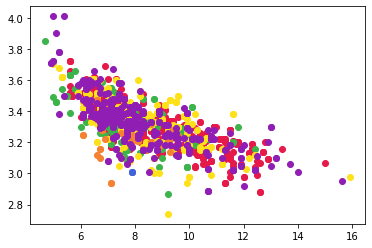

0.11727912431587177
150.0
1279


In [279]:
#Model 1: K means clustering
from sklearn.cluster import KMeans ## import kmeans model from sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans = KMeans(n_clusters=6, n_init=1000) ## init k means with a given number of centroids
kmeans.fit(XX, YY) ## fit
predictions = kmeans.predict(XX) ## make predictions
print(predictions)
print(YY)
show_data(features, predictions)
correct_predictions=np.ones(len(YY))
correct_predictions=correct_predictions[YY==predictions]
accuracy=sum(correct_predictions)/len(YY)
print(accuracy)
print(sum(correct_predictions))
print(len(YY))

0.5551211884284597
0.563721657544957
0.6059421422986708
0.6411258795934324
0.6880375293197811
0.7412040656763096
0.7849882720875684
0.8389366692728695
0.8788115715402658
0.90852228303362
0.9358874120406567
0.9569976544175137
0.9702892885066459
0.9796716184519155
0.9859265050820953
0.9953088350273651
0.9976544175136826
1.0
1.0
1.0
1279.0
1279


'Conclusion: Need to avoid overfitting: tune hyperparameter'

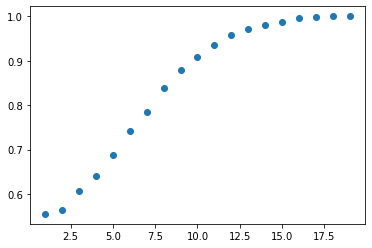

In [303]:
#Model 2: Classification trees
import sklearn.tree
from utils import show_data, visualise_predictions, colors, calc_accuracy
import matplotlib.pyplot as plt
tree_levels=range(1,20)
accuracy_list=[] #zeros(range(1,12))
for max_depth in tree_levels:
    classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)

    classificationTree.fit(XX, YY)
    classificationTree.predict(XX)


    correct_predictions_tree=np.ones(len(YY))
    correct_predictions_tree=correct_predictions_tree[YY==classificationTree.predict(XX)]
    accuracy_tree=sum(correct_predictions_tree)/len(YY)
    print(accuracy_tree)
    accuracy_list.append(accuracy_tree)
plt.scatter(tree_levels,accuracy_list)
plt.show
print(accuracy_tree)
print(sum(correct_predictions_tree))
print(len(YY))
#visualise_predictions(classificationTree.predict, XX)
#show_data(XX[:,[0,8]], YY)

'''Conclusion: Need to avoid overfitting: tune hyperparameter'''


In [291]:
2**11 #to avoid overfitting you need to be lower than 11 since 2**11>1279 datapoints. but according to plot it shold be at least max_depth<17


2048

In [319]:
#Model 3 DBSCAN
import sklearn.cluster
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

DBSCAN_wines=sklearn.cluster.DBSCAN(eps=.7,  min_samples=5).fit(XX)
labels=DBSCAN_wines.labels_
labels2=labels[labels!= -1]
print(labels2, len(labels2))
'''Need to play with the distances and min_samples but doesn't look like it will be too accurate '''

[0 1 2 3 4 1 3 4 5 0 2 1 0 4 2 4 5 1 5 3 1 5 1 3 4 0 2 5 2 5 0 1 1 3] 34


In [353]:
#Model 4 Random Forest
from sklearn.ensemble import RandomForestClassifier
from utils import show_data, visualise_predictions, colors, calc_accuracy


randomForest = RandomForestClassifier(n_estimators=90, max_depth=7, max_samples=1279) # init random forest
randomForest.fit(XX, YY) # fit random forest of decision trees
#visualise_predictions(randomForest.predict, XX, YY) # visualise
randomForest.score(XX, YY) # use the model's score method to compute it's accuracy
#''' Play with the hiperparameters, check user guide'''
#calc_accuracy()

0.8639562157935887

In [362]:
#Model 5 Adaboost
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html
import sklearn.ensemble
from utils import show_data, visualise_predictions, colors, calc_accuracy

adaBoost = sklearn.ensemble.AdaBoostClassifier(sklearn.tree.DecisionTreeClassifier(max_depth=4),n_estimators=90)
adaBoost.fit(XX, YY)
predictions = adaBoost.predict(XX)
calc_accuracy(predictions, YY)



80.0625488663018

In [ ]:
#next models: Random forest, boosting, adabost, gradient boosting and xgboost.